In [2]:
from planetengine import systems
from planetengine.initials.sinusoidal import Sinusoidal
system = systems.isovisc(res = 16, aspect = 3, temperatureField = Sinusoidal(freq = 5))


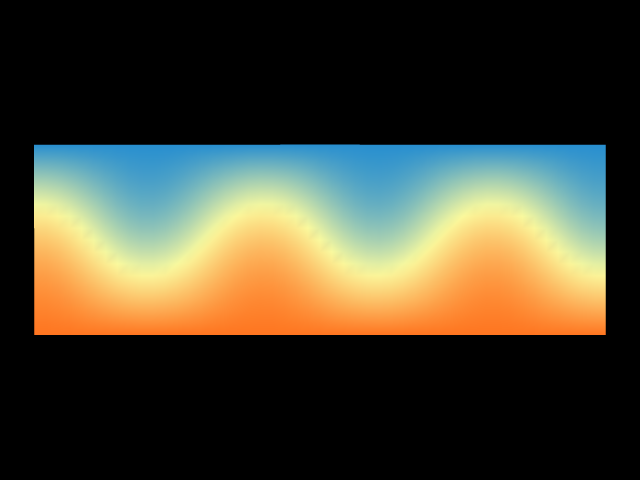

In [3]:
from planetengine import quickShow
quickShow(system.locals.temperatureField)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from planetengine.functions import gradient, integral, surface
temp, cond = system.locals.temperatureField, system.locals.conductionField
adiabatic, conductive = gradient.rad(temp), gradient.rad(cond)
thetaGrad = adiabatic / conductive
Nu = integral.outer(thetaGrad)
Nus = surface.outer(thetaGrad)
NusData = Nus.evaluate()
avNus = np.average(NusData)
NusNorm = (NusData - avNus) / avNus
sp = np.abs(np.fft.rfft(NusNorm)).real
freq = np.fft.rfftfreq(NusNorm.size, 1. / (2. * sp.size))
domFreq = int(round(max(zip(sp, freq))[1]))

Old object found - reusing.
Old object found - reusing.
Old object found - reusing.
Old object found - reusing.


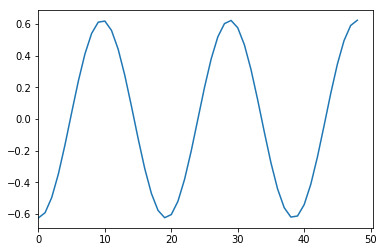

In [13]:
plt.plot(NusNorm)
plt.xlim(0.)
plt.show()

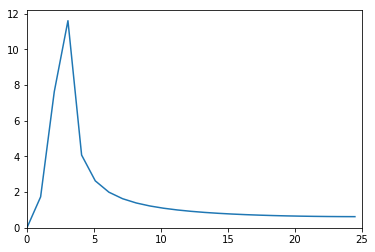

In [16]:
plt.plot(freq, sp)
plt.xlim(0., int(max(freq)))
plt.ylim(0.)
plt.show()

In [15]:
freq

array([  0.        ,   1.02040816,   2.04081633,   3.06122449,
         4.08163265,   5.10204082,   6.12244898,   7.14285714,
         8.16326531,   9.18367347,  10.20408163,  11.2244898 ,
        12.24489796,  13.26530612,  14.28571429,  15.30612245,
        16.32653061,  17.34693878,  18.36734694,  19.3877551 ,
        20.40816327,  21.42857143,  22.44897959,  23.46938776,  24.48979592])

In [9]:
domFreq

3

In [ ]:
samples = range(1, int(max(freq)))
interps = np.interp(samples, freq, sp)
sorteds = sorted(zip(interps, samples))
primepower, primefreq = sorteds[-1]
secondpower, secondfreq = sorteds[-2]
outs = (primefreq, secondfreq, secondpower / primepower)